In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
mnist = fetch_openml('mnist_784')

In [8]:
data, target = mnist["data"], mnist["target"]

print(f"data의 type   : {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},    target의 shape : {target.shape}")

data의 type   : <class 'pandas.core.frame.DataFrame'>,  data의 shape : (70000, 784)
target의 type : <class 'pandas.core.series.Series'>,    target의 shape : (70000,)


In [9]:
target.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [10]:
target = target.astype(np.int8)
data, target = data.values, target.values

print(f"data의 type   : {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},    target의 shape : {target.shape}")

data의 type   : <class 'numpy.ndarray'>,  data의 shape : (70000, 784)
target의 type : <class 'numpy.ndarray'>,    target의 shape : (70000,)


In [11]:
print(target[10:20])

[3 5 3 6 1 7 2 8 6 9]


In [12]:
target_dict = {}
label, freq = np.unique(target, return_counts=True)

for l, f in zip(label, freq):
    target_dict[l] = f
    
print(target_dict)

{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


In [13]:
print(np.max(data), np.min(data))

data = data / 255      # To keep our gradients manageable
print(np.max(data), np.min(data))

255.0 0.0
1.0 0.0


In [14]:
digits = 10
examples = target.shape[0]     # 70000
target_new = np.eye(digits)[target.reshape(1, -1)]

In [15]:
print(f"target_new의 shape : {target_new.shape}")
print()
print(target[10:20])
print()
print(target_new[0, 10:20, :])

target_new의 shape : (1, 70000, 10)

[3 5 3 6 1 7 2 8 6 9]

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
target_new = target_new.reshape(-1, 10)
print(f"target의 shape : {target_new.shape}")
print()
print(target_new[10:20, :])

target의 shape : (70000, 10)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [17]:
m = 60000
m_test = data.shape[0] - m

x_train, x_test = data[:m].T, data[m:].T
y_train, y_test = target_new[:m].T, target_new[m:].T

print(f"x_train의 shape : {x_train.shape},     y_train의 shape : {y_train.shape}")
print(f"x_test의 shape  : {x_test.shape},     y_test의 shape  : {y_test.shape}")

x_train의 shape : (784, 60000),     y_train의 shape : (10, 60000)
x_test의 shape  : (784, 10000),     y_test의 shape  : (10, 10000)


In [18]:
np.random.seed(2023)

shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:, shuffle_index], y_train[:, shuffle_index]

print(f"x_train의 shape : {x_train.shape},     y_train의 shape : {y_train.shape}")
print(f"x_test의 shape  : {x_test.shape},     y_test의 shape  : {y_test.shape}")

x_train의 shape : (784, 60000),     y_train의 shape : (10, 60000)
x_test의 shape  : (784, 10000),     y_test의 shape  : (10, 10000)


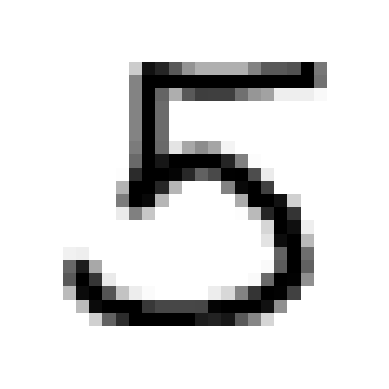

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
i = 20230
plt.imshow(x_train[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:, i])

In [21]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

def compute_multiclass_loss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1.0/m) * L_sum
    return L

In [23]:
def feed_forward(X, params):
    cache = {}
    cache["Z0"] = np.matmul(params["W0"].T, X) + params["b0"]
    cache["A0"] = sigmoid(cache["Z0"])
    cache["Z1"] = np.matmul(params["W1"].T, cache["A0"]) + params["b1"]
    cache["A1"] = np.exp(cache["Z1"]) / np.sum(np.exp(cache["Z1"]), axis=0)
    return cache

In [22]:
def back_propagate(X, Y, params, cache, m_batch):
    delta1 = cache["A1"] - Y    # (10, 60000)
    dw1 = (1.0/m_batch) * np.matmul(cache["A0"], delta1.T)     # (64, 60000) * (60000, 10) = (64, 10)
    db1 = (1.0/m_batch) * np.sum(delta1, axis=1, keepdims=True)   # (10, 1)
    
    delta0 = np.multiply(sigmoid(cache["Z0"]) * (1.0 - sigmoid(cache["Z0"])), np.matmul(params["W1"], delta1)) # (64,60000) & (64,10)*(10, 60000)=(64,60000) ==> (64,60000)
    
    dw0 = (1.0/m_batch) * np.matmul(X, delta0.T)
    db0 = (1.0/m_batch) * np.sum(delta0, axis=1, keepdims=True)
    
    grads = {"dw0" : dw0, "db0" : db0, "dw1" : dw1, "db1" : db1}
    return grads

In [24]:
q0 = np.array([[2,3,5,7],[1,4,2,8],[7,2,3,7]])

w1 = np.array([[2,5],[9,1],[3,2]])
d1 = np.array([[3,5,1,3],[7,1,4,6]])

print(q0 * (1-q0))
print(np.matmul(w1, d1))
print(q0 * (1-q0) * np.matmul(w1, d1))


[[ -2  -6 -20 -42]
 [  0 -12  -2 -56]
 [-42  -2  -6 -42]]
[[41 15 22 36]
 [34 46 13 33]
 [23 17 11 21]]
[[  -82   -90  -440 -1512]
 [    0  -552   -26 -1848]
 [ -966   -34   -66  -882]]


In [25]:
np.random.seed(2023)

n_x = x_train.shape[0]
n_h = 64
learning_rate = 1
beta = 0.9
batch_size = 128
batches = m // batch_size

In [26]:
params = {"W0" : np.random.randn(n_x, n_h) * np.sqrt(1.0/n_x),    "b0" : np.zeros((n_h, 1)) * np.sqrt(1.0/n_x),
          "W1" : np.random.randn(n_h, digits) * np.sqrt(1.0/n_h), "b1" : np.zeros((digits, 1)) * np.sqrt(1.0/n_h)}

v_dw0 = np.zeros(params["W0"].shape)
v_db0 = np.zeros(params["b0"].shape)
v_dw1 = np.zeros(params["W1"].shape)
v_db1 = np.zeros(params["b1"].shape)

In [27]:
for i in range(30):
    
    permutation = np.random.permutation(x_train.shape[1])
    x_train_shuffled = x_train[:, permutation]
    y_train_shuffled = y_train[:, permutation]
    
    for j in range(batches):
        begin = j * batch_size
        end = min(begin + batch_size, x_train.shape[1]-1)
        X = x_train_shuffled[:, begin:end]
        Y = y_train_shuffled[:, begin:end]
        m_batch = end - begin
        
        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache, m_batch)
        
        v_dw0 = beta * v_dw0 + (1.0 - beta) * grads["dw0"]
        v_db0 = beta * v_db0 + (1.0 - beta) * grads["db0"]
        v_dw1 = beta * v_dw1 + (1.0 - beta) * grads["dw1"]
        v_db1 = beta * v_db1 + (1.0 - beta) * grads["db1"]
        
        params["W0"] -= learning_rate * v_dw0
        params["b0"] -= learning_rate * v_db0
        params["W1"] -= learning_rate * v_dw1
        params["b1"] -= learning_rate * v_db1
        
    cache = feed_forward(x_train, params)
    train_cost = compute_multiclass_loss(y_train, cache["A1"])
    cache = feed_forward(x_test, params)
    test_cost = compute_multiclass_loss(y_test, cache["A1"])
    print(f"Epoch {i+1:2d} : training cost = {train_cost:.10f},  test cost : {test_cost:.10f}")
        
print("Done!")    

Epoch  1 : training cost = 0.2474298118,  test cost : 0.2473321741
Epoch  2 : training cost = 0.1933355579,  test cost : 0.1970380586
Epoch  3 : training cost = 0.1491959792,  test cost : 0.1559571629
Epoch  4 : training cost = 0.1268977925,  test cost : 0.1371186696
Epoch  5 : training cost = 0.1106544184,  test cost : 0.1224431577
Epoch  6 : training cost = 0.0964592784,  test cost : 0.1091176707
Epoch  7 : training cost = 0.0857526438,  test cost : 0.1025292590
Epoch  8 : training cost = 0.0796376342,  test cost : 0.1000686749
Epoch  9 : training cost = 0.0716921716,  test cost : 0.0929349102
Epoch 10 : training cost = 0.0668371152,  test cost : 0.0908083798
Epoch 11 : training cost = 0.0643064472,  test cost : 0.0920360582
Epoch 12 : training cost = 0.0566496754,  test cost : 0.0856498351
Epoch 13 : training cost = 0.0521565918,  test cost : 0.0825498468
Epoch 14 : training cost = 0.0492943199,  test cost : 0.0830321695
Epoch 15 : training cost = 0.0482665570,  test cost : 0.083429

In [28]:
cache = feed_forward(x_test, params)
predictions = np.argmax(cache["A1"], axis=0)
labels = np.argmax(y_test, axis=0)

print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       991
           1       0.99      0.99      0.99      1138
           2       0.98      0.98      0.98      1030
           3       0.98      0.97      0.98      1024
           4       0.97      0.97      0.97       979
           5       0.97      0.99      0.98       875
           6       0.98      0.98      0.98       963
           7       0.98      0.97      0.97      1040
           8       0.97      0.98      0.97       964
           9       0.96      0.97      0.97       996

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [29]:
print(confusion_matrix(predictions, labels))

[[ 968    1    4    0    1    4    5    1    5    2]
 [   0 1124    3    0    0    1    3    5    0    2]
 [   2    2 1007    5    4    0    0    8    2    0]
 [   1    1    4  993    1    5    1    3    5   10]
 [   1    0    2    1  952    3    3    1    2   14]
 [   1    1    0    2    0  862    3    0    3    3]
 [   2    2    1    0    4    8  940    0    5    1]
 [   2    2    6    5    3    2    0 1006    7    7]
 [   2    2    5    3    3    5    3    0  941    0]
 [   1    0    0    1   14    2    0    4    4  970]]
